In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

Task 1

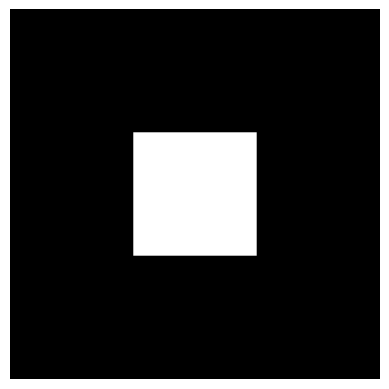

In [6]:
binary_image= np.zeros((300,300), dtype=np.uint8)
binary_image[100:200,100:200]=255
plt.axis('off')
displayImage(binary_image)

Task 2

Displaying images

In [7]:
image1=cv2.imread('concat1.jpg',0)
image2=cv2.imread('concat2.jpg',0)
image3=cv2.imread('concat3.jpg',0)
cv2.imshow('First img',image1)
cv2.imshow('Secong img',image2)
cv2.imshow('Third img',image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

Adjusting size

In [8]:
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
image3 = cv2.resize(image3, (image1.shape[1], image1.shape[0]))

Concatenating 

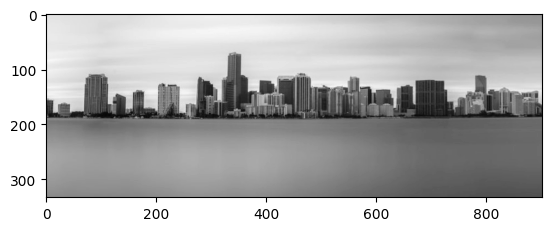

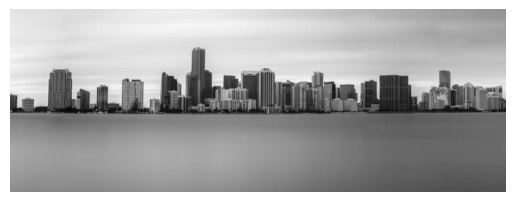

In [9]:
concatenated_image = cv2.hconcat([image1, image2, image3])
displayImage(concatenated_image)
#without axis
plt.axis("off")
displayImage(concatenated_image)


Task 3

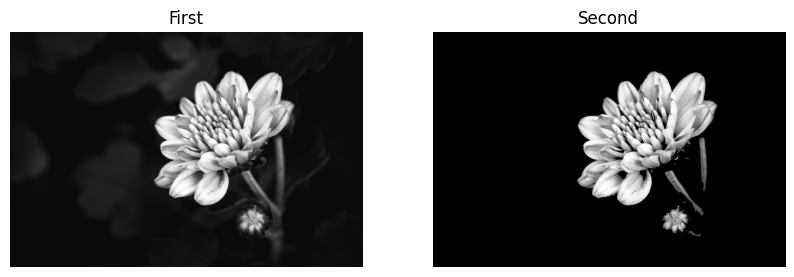

In [10]:
image4=cv2.imread('threshold.jpg',0)
image_array = np.array(image4)
threshold = 70
thresholded_image_array = np.where(image_array < threshold, 0, image_array)
thresholded_image = cv2.convertScaleAbs(thresholded_image_array)
displayImages(image4,thresholded_image)

Task 4

In [11]:
image5=cv2.imread('feature1.jpeg',cv2.IMREAD_GRAYSCALE)
image6=cv2.imread('feature2.jpeg',cv2.IMREAD_GRAYSCALE)

First method (Brute_Force)

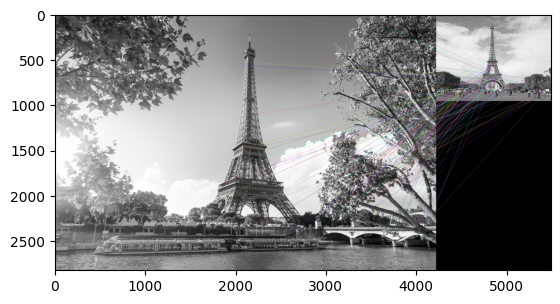

In [12]:
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(image5,None)
kp2,des2=orb.detectAndCompute(image6,None)
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)
matching_results=cv2.drawMatches(image5,kp1,image6,kp2,matches,None)
displayImage(matching_results)

Second method (FLANN based Matcher)

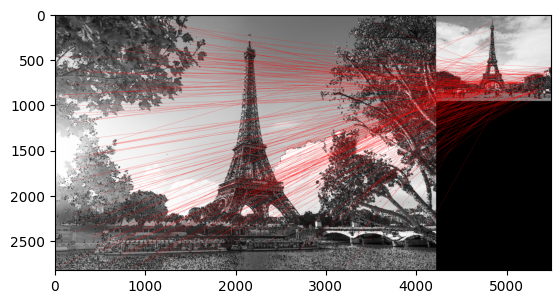

In [13]:

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(image5,None)
kp2, des2 = sift.detectAndCompute(image6,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
   matchesMask[i]=[1,0]
draw_params = dict(matchColor = (255,0,0) ,
 singlePointColor = (0,0,0),
 matchesMask = matchesMask,
 flags = cv2.DrawMatchesFlags_DEFAULT)
image7 = cv2.drawMatchesKnn(image5,kp1,image6,kp2,matches,None,**draw_params)
displayImage(image7)



Task 5

In [19]:
point1=None
point2=None
y1=y2=0
def mouse_callback(event, x, y, flags, param):
    global point1, point2, drawing,y1,y2

    if event == cv2.EVENT_LBUTTONDOWN:
        if point1 is None:
            point1 = (x,y) 
            y1=y
            print(f"Point 1: {point1}") 
            
        elif point2 is None:
            point2 = (x,y)
            y2=y
            print(f"Point 2: {point2}")
        width = image.shape[1]
        if point1 and point2:
            cv2.rectangle(image, (0,y1), (width,y2), (0, 0, 100), -1)


image = cv2.imread('threshold.jpg')
print (image.shape)
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

while True:
    cv2.imshow('Image', image)
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

(1067, 1600, 3)
Point 1: (688, 27)
Point 2: (673, 90)
